In [699]:
! pip install plotly

In [700]:
from pandas_datareader.data import DataReader
from datetime import datetime
from IPython.display import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import math
from itertools import cycle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import plotly.express as px
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [701]:
tech_list = ['TCS.NS','LTI.NS','MINDTREE.NS','INFY.NS']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(2014, 1, 1)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    variable_name = stock.replace('.NS', '')
    globals()[variable_name.lower()] = DataReader(stock, 'yahoo', start, end)

In [702]:
company_list = [tcs, lti, mindtree, infy]

Text(0.5, 1.0, 'Infosys')

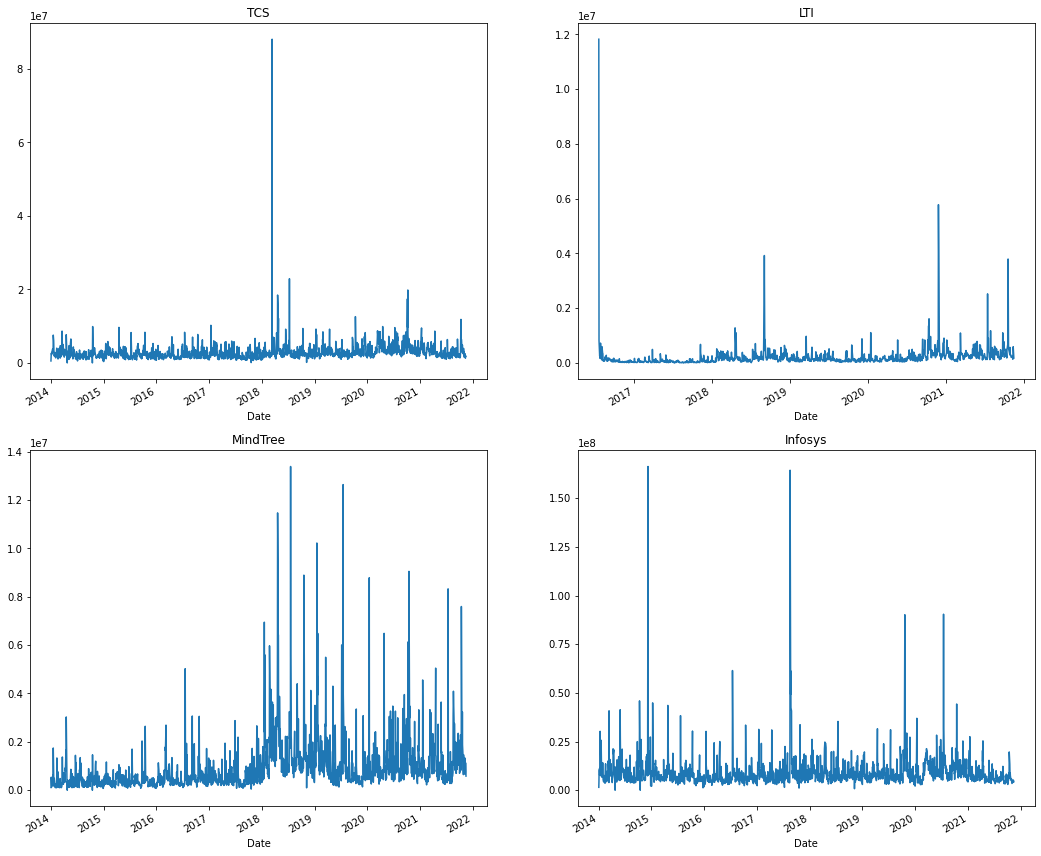

<Figure size 1080x432 with 0 Axes>

In [703]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,16))
plt.title('Closing')
plt.figure(figsize=(15, 6))
tcs['Volume'].plot(ax=axes[0,0])
axes[0, 0].set_title("TCS")
lti['Volume'].plot(ax=axes[0,1])
axes[0, 1].set_title("LTI")
mindtree['Volume'].plot(ax=axes[1,0])
axes[1, 0].set_title("MindTree")
infy['Volume'].plot(ax=axes[1,1])
axes[1, 1].set_title("Infosys")

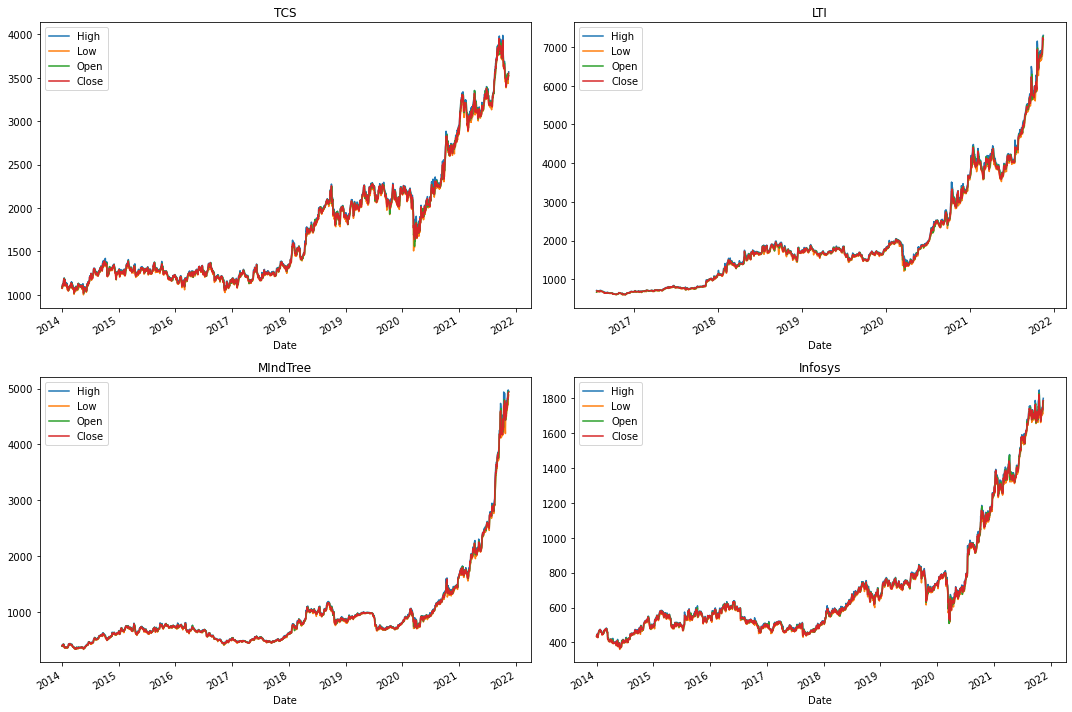

In [704]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

tcs[["High", "Low", "Open", "Close"]].plot(ax=axes[0,0])
axes[0,0].set_title("TCS")

lti[["High", "Low", "Open", "Close"]].plot(ax=axes[0,1])
axes[0,1].set_title("LTI")

mindtree[["High", "Low", "Open", "Close"]].plot(ax=axes[1,0])
axes[1,0].set_title('MIndTree')

infy[["High", "Low", "Open", "Close"]].plot(ax=axes[1,1])
axes[1,1].set_title("Infosys")

fig.tight_layout()

In [705]:
# Calculate Moving Averages for 10, 20, 50 Days

ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

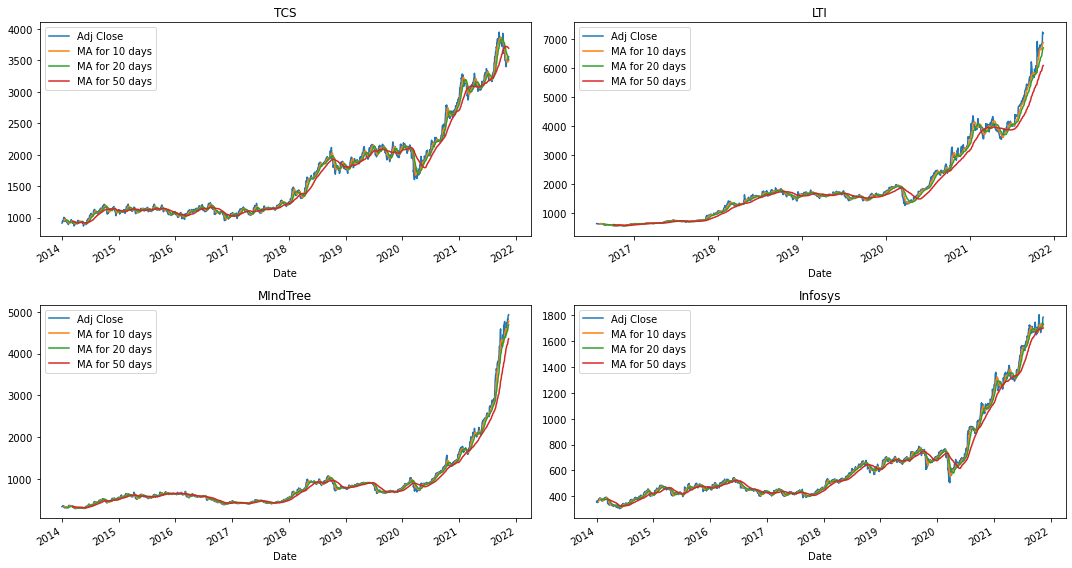

In [706]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

tcs[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=axes[0,0])
axes[0,0].set_title("TCS")

lti[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=axes[0,1])
axes[0,1].set_title("LTI")

mindtree[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=axes[1,0])
axes[1,0].set_title('MIndTree')

infy[["Adj Close", "MA for 10 days", "MA for 20 days", "MA for 50 days"]].plot(ax=axes[1,1])
axes[1,1].set_title("Infosys")

fig.tight_layout()

In [707]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head()  

Symbols,TCS.NS,LTI.NS,MINDTREE.NS,INFY.NS
Date,,,,
2014-01-01,914.562744,NaN,329.115814,354.276489
2014-01-02,920.381470,NaN,331.176544,355.558502
2014-01-03,943.826355,NaN,339.759216,364.200928
2014-01-06,951.216797,NaN,338.994354,359.374084
2014-01-07,937.009705,NaN,336.020233,353.168060


In [708]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,TCS.NS,LTI.NS,MINDTREE.NS,INFY.NS
Date,,,,
2014-01-01,NaN,NaN,NaN,NaN
2014-01-02,0.006362,NaN,0.006261,0.003619
2014-01-03,0.025473,NaN,0.025916,0.024307
2014-01-06,0.007830,NaN,-0.002251,-0.013253
2014-01-07,-0.014936,NaN,-0.008773,-0.017269


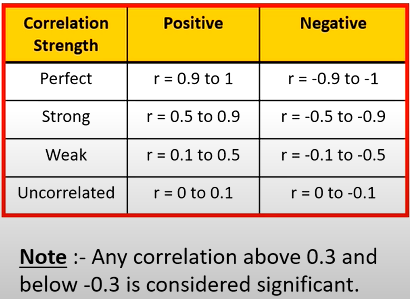

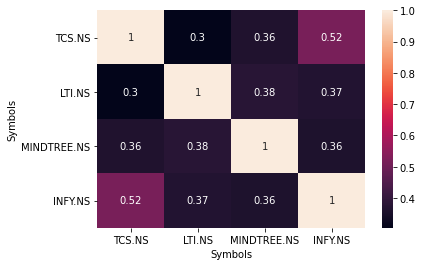

In [709]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='rocket')
Image(filename='corr.png') 

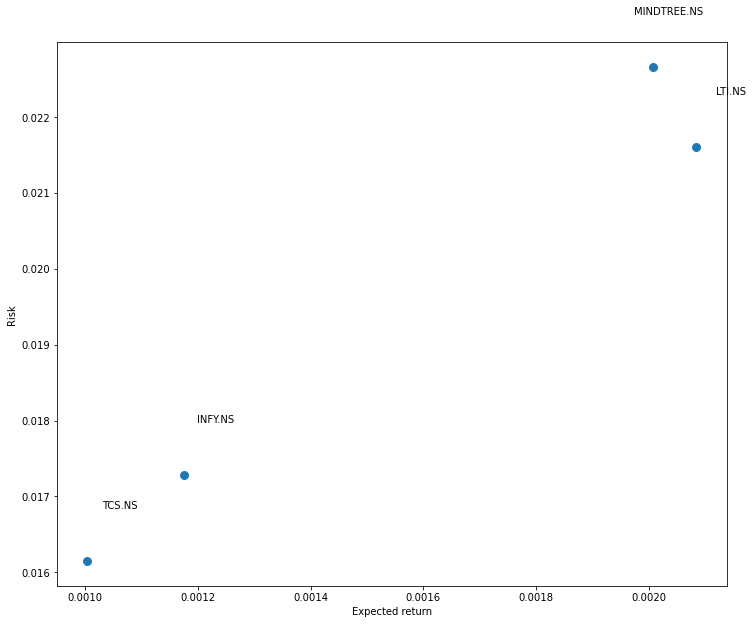

In [710]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom')

In [711]:
tcs['Date'] = pd.to_datetime(tcs.index, format='%Y-%m-%d')

y_overall = tcs.loc[(tcs['Date'] >= '2020-04-01')
                     & (tcs['Date'] <= '2021-11-14')]

y_overall=y_overall[['Open','High','Low','Close']]
monthvise= y_overall.groupby(y_overall.index.month)[['Open','High','Low','Close']].mean()
monthvise

,Open,High,Low,Close
Date,,,,
1,3172.747498,3211.040002,3134.507495,3174.432520
2,3121.490002,3152.442505,3075.512488,3105.882532
3,3058.845226,3107.249988,3031.702393,3070.069057
4,2514.654059,2545.471637,2471.252715,2504.094595
5,2539.684614,2564.194871,2512.574369,2538.915386
6,2655.611375,2683.810225,2634.181821,2658.001143
7,2702.944314,2730.124989,2674.878418,2698.655678
8,2862.286912,2895.690482,2841.625017,2870.867844
9,3099.254650,3136.841854,3064.323265,3100.899982


Text(0.5, 1.0, 'TCS')

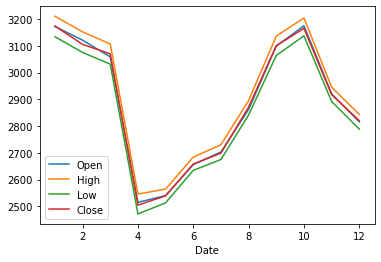

In [712]:
fig.set_figheight(8)
fig.set_figwidth(40)

monthvise[["Open", "High", "Low", "Close"]].plot()
axes[0,0].set_title("TCS")

Considering Data after Mar 2020 due to drastic change due to covid

Machine Learning

In [731]:
tcs_close = tcs[['Close']]
tcs_close = tcs_close[tcs_close.index > '2020-04-01']

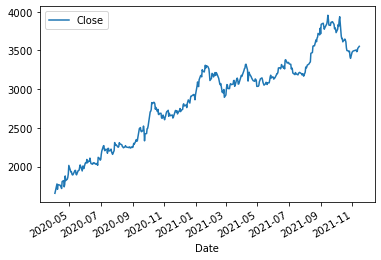

In [732]:

tcs_close[["Close"]].plot()
axes[0,0].set_title("TCS")
original_df = tcs_close.copy()

In [733]:
print("Input for prediction: ",tcs_close.shape[0])

Input for prediction:  400


In [734]:
scaler=MinMaxScaler(feature_range=(0,1))
tcs_close=scaler.fit_transform(np.array(tcs_close).reshape(-1,1))
print(tcs_close.shape)

(400, 1)


In [735]:
training_size=int(len(tcs_close)*0.85) # 85 percent train
test_size=len(tcs_close)-training_size
train_data,test_data=tcs_close[0:training_size,:],tcs_close[training_size:len(tcs_close),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (340, 1)
test_data:  (60, 1)


In [736]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [737]:


time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (324, 15)
y_train:  (324,)
X_test:  (44, 15)
y_test (44,)


In [738]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (324, 15, 1)
X_test:  (44, 15, 1)


In [739]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [740]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
11/11 [==============================] - 1s 25ms/step - loss: 0.3322 - val_loss: 0.9322
Epoch 2/200
11/11 [==============================] - 0s 9ms/step - loss: 0.2758 - val_loss: 0.7934
Epoch 3/200
11/11 [==============================] - 0s 8ms/step - loss: 0.2207 - val_loss: 0.6502
Epoch 4/200
11/11 [==============================] - 0s 8ms/step - loss: 0.1666 - val_loss: 0.5026
Epoch 5/200
11/11 [==============================] - 0s 8ms/step - loss: 0.1140 - val_loss: 0.3417
Epoch 6/200
11/11 [==============================] - 0s 8ms/step - loss: 0.0637 - val_loss: 0.1783
Epoch 7/200
11/11 [==============================] - 0s 8ms/step - loss: 0.0265 - val_loss: 0.0460
Epoch 8/200
11/11 [==============================] - 0s 8ms/step - loss: 0.0142 - val_loss: 0.0065
Epoch 9/200
11/11 [==============================] - 0s 8ms/step - loss: 0.0135 - val_loss: 0.0107
Epoch 10/200
11/11 [==============================] - ETA: 0s - loss: 0.009 - 0s 8ms/step - loss: 0.0099 - v

11/11 [==============================] - 0s 8ms/step - loss: 9.9353e-04 - val_loss: 0.0021
Epoch 83/200
11/11 [==============================] - 0s 8ms/step - loss: 0.0010 - val_loss: 0.0021
Epoch 84/200
11/11 [==============================] - 0s 9ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 85/200
11/11 [==============================] - 0s 8ms/step - loss: 9.7529e-04 - val_loss: 0.0021
Epoch 86/200
11/11 [==============================] - 0s 8ms/step - loss: 9.8073e-04 - val_loss: 0.0022
Epoch 87/200
11/11 [==============================] - 0s 8ms/step - loss: 9.9991e-04 - val_loss: 0.0022
Epoch 88/200
11/11 [==============================] - 0s 8ms/step - loss: 9.9931e-04 - val_loss: 0.0021
Epoch 89/200
11/11 [==============================] - 0s 8ms/step - loss: 9.7205e-04 - val_loss: 0.0021
Epoch 90/200
11/11 [==============================] - 0s 8ms/step - loss: 9.6256e-04 - val_loss: 0.0020
Epoch 91/200
11/11 [==============================] - 0s 8ms/step - loss: 9.8245e-04 

Epoch 160/200
11/11 [==============================] - 0s 8ms/step - loss: 7.1360e-04 - val_loss: 0.0013
Epoch 161/200
11/11 [==============================] - 0s 8ms/step - loss: 7.2934e-04 - val_loss: 0.0011
Epoch 162/200
11/11 [==============================] - 0s 8ms/step - loss: 7.0769e-04 - val_loss: 0.0012
Epoch 163/200
11/11 [==============================] - 0s 8ms/step - loss: 7.5483e-04 - val_loss: 0.0012
Epoch 164/200
11/11 [==============================] - 0s 8ms/step - loss: 7.5338e-04 - val_loss: 0.0012
Epoch 165/200
11/11 [==============================] - 0s 8ms/step - loss: 7.1795e-04 - val_loss: 0.0011
Epoch 166/200
11/11 [==============================] - 0s 8ms/step - loss: 7.3371e-04 - val_loss: 0.0012
Epoch 167/200
11/11 [==============================] - 0s 8ms/step - loss: 6.9948e-04 - val_loss: 0.0012
Epoch 168/200
11/11 [==============================] - 0s 8ms/step - loss: 7.4278e-04 - val_loss: 0.0011
Epoch 169/200
11/11 [==============================] - 

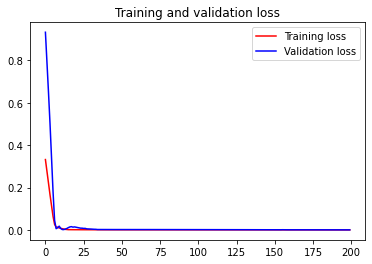

<Figure size 432x288 with 0 Axes>

In [741]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [742]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

((324, 1), (44, 1))

In [743]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [744]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  56.350875064659185
Train data MSE:  3175.421120552828
Train data MAE:  43.852400414737644
-------------------------------------------------------------------------------------
Test data RMSE:  68.61171891670378
Test data MSE:  4707.567972704767
Test data MAE:  54.28420743075281


In [745]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9855953708573945
Test data explained variance regression score: 0.8312328511874894


Train predicted data:  (400, 1)
Test predicted data:  (400, 1)


<AxesSubplot:xlabel='Date'>

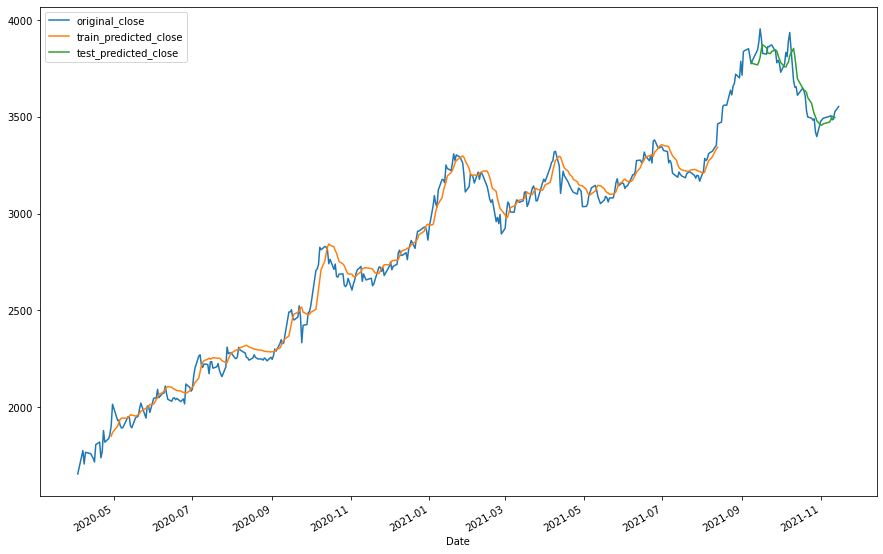

In [747]:
look_back=time_step
trainPredictPlot = np.empty_like(tcs_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(tcs_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(tcs_close)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({
                       'original_close': original_df['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

plotdf[["original_close", "train_predicted_close", "test_predicted_close"]].plot(figsize=(15, 10))